### Data vocabulary

##### 1. (age): age in years 
##### 2. (sex): sex (1 = male; 0 = female) 
##### 3. (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
##### 4. (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
##### 5. (chol): serum cholestoral in mg/dl 
##### 6. (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
##### 7. (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
##### 8. (thalach): maximum heart rate achieved 
##### 9. (exang): exercise induced angina (1 = yes; 0 = no) 
##### 10.(oldpeak): ST depression induced by exercise relative to rest 
##### 11.(slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
##### 12.(ca): number of major vessels (0-3) colored by flourosopy 
##### 13.(thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
##### 14.(num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve,roc_curve,roc_auc_score

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)
import warnings
warnings.filterwarnings("ignore")

## Ingest the data to notebook

In [2]:
df=pd.read_csv("heart.csv")
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


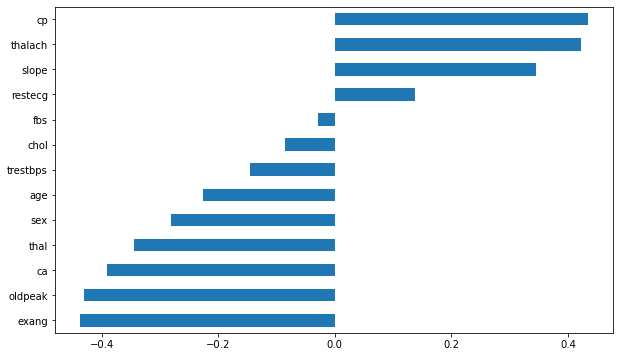

In [4]:
df.corr()["target"].drop(index="target").sort_values().plot(kind ="barh");

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

### Data Preprocessing

In [8]:
X=df.drop(columns="target")
y=df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Implement Logistic Regression and Evaluate

[[28  7]
 [ 6 35]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.83      0.85      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



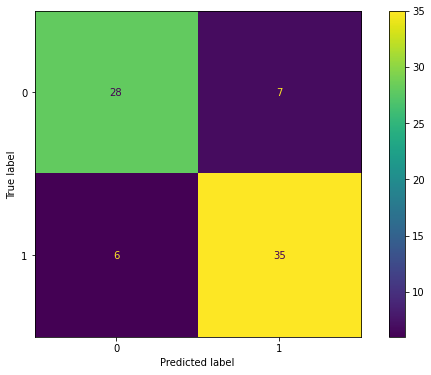

In [9]:
log_mod = LogisticRegression().fit(X_train_scale,y_train)
y_pred_scale = log_mod.predict(X_test_scale)
y_pred_proba = log_mod.predict_proba(X_test_scale)

print(confusion_matrix(y_test,y_pred_scale))
plot_confusion_matrix(log_mod,X_test_scale,y_test)
print(classification_report(y_test,y_pred_scale));

In [10]:
scores = cross_validate(LogisticRegression(), X_train_scale, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
pd.DataFrame(scores).mean()

fit_time                   0.003411
score_time                 0.002069
test_accuracy              0.827273
test_precision_weighted    0.835590
test_recall_weighted       0.827273
test_f1_weighted           0.825038
dtype: float64

In [11]:
log_modelCV = LogisticRegression(multi_class="ovr",max_iter=5000)
penalty = ["l1", "l2"]
l1_ratio = np.linspace(0, 1, 20) #linspace
C = np.logspace(0, 10, 20) #logaritmik , C değerlerinin logaritmik aralıktan seçilmesi tavsiye edilir.

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}
grid_model = GridSearchCV(log_modelCV, param_grid = param_grid)
grid_model.fit(X_train_scale,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2']})

In [12]:
grid_model.best_params_

{'C': 37.926901907322495, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [13]:
grid_model_cv = LogisticRegression(penalty="l2",C=37.926901907322495, max_iter=5000,
                   multi_class='ovr',l1_ratio = 0) 

[[29  6]
 [ 6 35]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



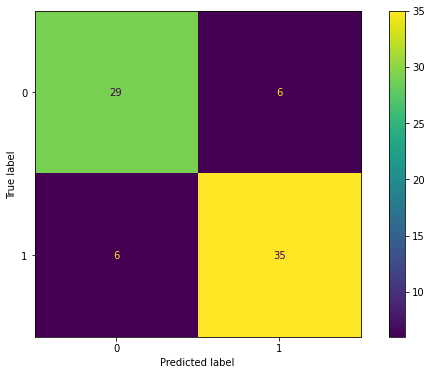

In [14]:
grid_model_cv.fit(X_train_scale,y_train)
y_pred = grid_model_cv.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(grid_model_cv, X_test_scale, y_test);

In [15]:
roc_auc_score(y_test,y_pred_proba[:,1])
fp,tp,treshold =  roc_curve(y_test,y_pred_proba[:,1])
optimum_treshold = treshold[np.argmax(tp-fp)]
optimum_treshold

0.6335842054598753

In [16]:
y_pred_opt = [1 if i > optimum_treshold else 0 for i in y_pred_proba[:,1]]
print(classification_report(y_test,y_pred_opt))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.97      0.76      0.85        41

    accuracy                           0.86        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.88      0.86      0.85        76



### Chose best model and make a random prediction

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [18]:
scaler = StandardScaler()
knn =KNeighborsClassifier()

steps = [('scaler', scaler), ('knn', knn)]
pipe =Pipeline(steps=steps)

k_values= list(range(1,18))
param_grid={"knn__n_neighbors":k_values}
full_cv_class = GridSearchCV(pipe,param_grid=param_grid,scoring="accuracy",cv=10)
full_cv_class.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17]},
             scoring='accuracy')

In [19]:
full_cv_class.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=8))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=8),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 8,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [20]:
def k_neighbors(k):
    test_error_rates = []
    for k in range(1,k):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train,y_train) 

        y_pred_test = knn_model.predict(X_test_scale)

        test_error = 1 - accuracy_score(y_test,y_pred_test)
        test_error_rates.append(test_error)
    return test_error_rates.index(min(test_error_rates))

In [21]:
k_neighbors(8)

6

In [22]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scale,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scale)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

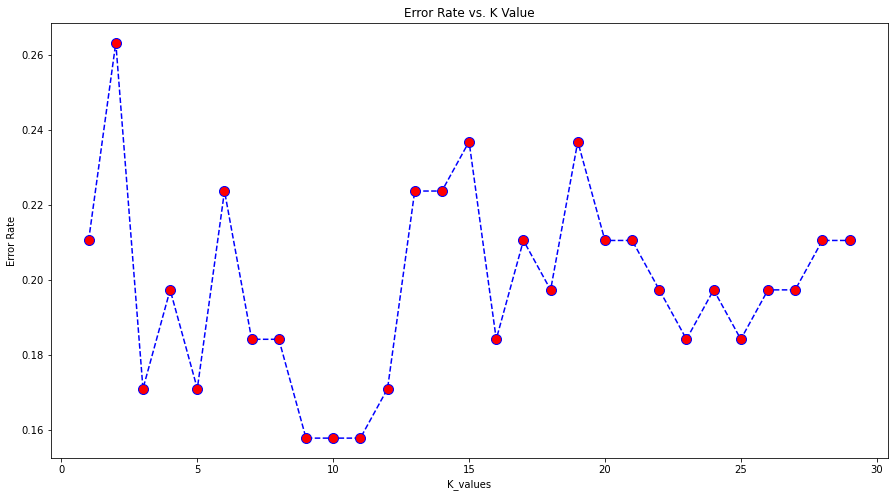

In [23]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate');

In [24]:
scaler: StandardScaler()
knn: KNeighborsClassifier(n_neighbors=17)
steps = [('scaler', scaler), ('knn', knn)]
pipe = Pipeline(steps=steps)

pipe.fit(X_train,y_train)
y_pred_pipe = pipe.predict(X_test)
print(classification_report(y_test,y_pred_pipe))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



### Implement SVM and Evaluate

In [25]:
from sklearn.svm import SVC,SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
param_grid1 = {'svc__C': [0.01,0.1,0.2,0.5,1.0,2],
               'svc__degree': [1,2,3],
               'svc__gamma': ['scale',"auto"],
               'svc__kernel': ['rbf',"linear"]}
gridCV_pipe = GridSearchCV(pipe1,param_grid=param_grid1,scoring="f1",n_jobs=-1,cv=10)
gridCV_pipe.fit(X_train,y_train) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 0.2, 0.5, 1.0, 2],
                         'svc__degree': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['rbf', 'linear']},
             scoring='f1')

In [27]:
y_pipeCV = gridCV_pipe.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pipeCV))
print(classification_report(y_test,y_pipeCV)) # SVC değeri 

[[29  6]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [29]:
print(confusion_matrix(y_test,y_pred_pipe))
print(classification_report(y_test,y_pred_pipe))  #KNN e göre değerler

[[31  4]
 [ 5 36]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

